# 📉 Value at Risk (VaR) and Conditional Value at Risk (CVaR) Simulation

This notebook estimates portfolio risk using **Value at Risk (VaR)** and **Conditional Value at Risk (CVaR)** based on historical return data. It demonstrates both historical and parametric methods to quantify potential losses under adverse market conditions.

In [6]:
# Downloading asset data

!pip install yfinance

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

assets = ["AAPL", "MSFT", "GOOG", "AMZN"]  # example portfolio
data = yf.download(assets, start="2020-01-01", end="2024-12-31")

if 'Adj Close' in data.columns.get_level_values(0):
    data = data['Adj Close']
else:
    data = data['Close']

/tmp/ipython-input-3330050080.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(assets, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  4 of 4 completed


In [7]:
# Assigning Portfolio weightage
returns = np.log(data / data.shift(1)).dropna() # Calculating daily log returns

weights = np.array([0.25, 0.25, 0.25, 0.25])  # equal weights
portfolio_returns = returns.dot(weights)

In [12]:
# Monte Carlo

n_sims = 1000
n_days = 250
sim_portfolio = []

# Convert portfolio returns to a list
port_ret_list = portfolio_returns.tolist()

for j in range(n_sims):
    total_return = 0
    for j in range(n_days):
        # Pick a daily return at random
        daily_ret = np.random.choice(port_ret_list)
        total_return += daily_ret
    sim_portfolio.append(total_return)

sim_portfolio = np.array(sim_portfolio)

In [14]:
# Calculate risk metrics

VaR_95 = np.percentile(sim_portfolio, 5)
CVaR_95 = sim_portfolio[sim_portfolio <= VaR_95].mean()

print(f"1-Year 95% VaR: {VaR_95:.4f}")
print(f"1-Year 95% CVaR: {CVaR_95:.4f}")

1-Year 95% VaR: -0.2692
1-Year 95% CVaR: -0.4037


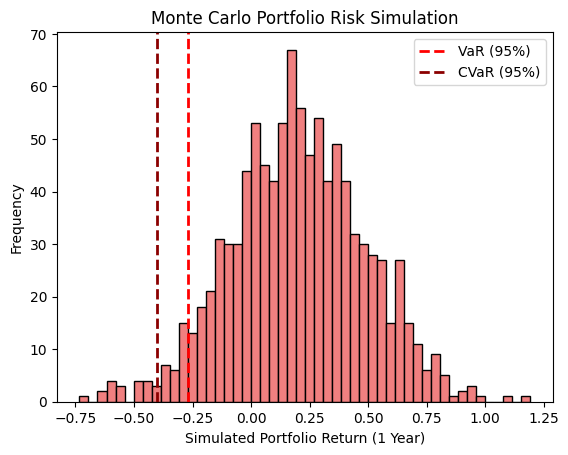

In [15]:
# Plot distribution
plt.hist(sim_portfolio, bins=50, color="lightcoral", edgecolor="black")
plt.axvline(VaR_95, color="red", linestyle="dashed", linewidth=2, label="VaR (95%)")
plt.axvline(CVaR_95, color="darkred", linestyle="dashed", linewidth=2, label="CVaR (95%)")
plt.xlabel("Simulated Portfolio Return (1 Year)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Portfolio Risk Simulation")
plt.legend()
plt.show()